
# Projeto: Previsão de Aluguel de Bicicletas em Seoul

Este projeto foi desenvolvido como parte do processo seletivo para estágio em uma consultoria de TI.

**Objetivo:** Prever a quantidade de bicicletas alugadas na cidade de Seoul (Rented Bike Count), com base em variáveis como temperatura, umidade, velocidade do vento e dia da semana.

**Tipo de problema:** Regressão (variável alvo é contínua).


In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [35]:

# Carregar o dataset
df = pd.read_excel('/content/seoul_bike_data.xlsx')

# Mostrar as primeiras linhas
df.head()


,DateTime,Day,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,2017-01-12 00:00:00,12,5,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,2017-01-12 01:00:00,12,5,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,2017-01-12 02:00:00,12,5,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,2017-01-12 03:00:00,12,5,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,2017-01-12 04:00:00,12,5,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [36]:

# Informações gerais
df.info()

# Verificar valores nulos
df.isnull().sum()

# Estatísticas descritivas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   8760 non-null   object 
 1   Day                        8760 non-null   int64  
 2   Weekday                    8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Rented Bike Count          8760 non-null   int64  
 5   Temperature(°C)            8760 non-null   float64
 6   Humidity(%)                8760 non-null   int64  
 7   Wind speed (m/s)           8760 non-null   float64
 8   Visibility (10m)           8760 non-null   int64  
 9   Dew point temperature(°C)  8760 non-null   float64
 10  Solar Radiation (MJ/m2)    8760 non-null   float64
 11  Rainfall(mm)               8760 non-null   float64
 12  Snowfall (cm)              8760 non-null   float64
dtypes: float64(6), int64(6), object(1)
memory usage:

,Day,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,15.720548,3.980822,11.500000,704.602055,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,8.796749,2.004811,6.922582,644.997468,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,1.000000,1.000000,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,5.750000,191.000000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,16.000000,4.000000,11.500000,504.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,23.000000,6.000000,17.250000,1065.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,31.000000,7.000000,23.000000,3556.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


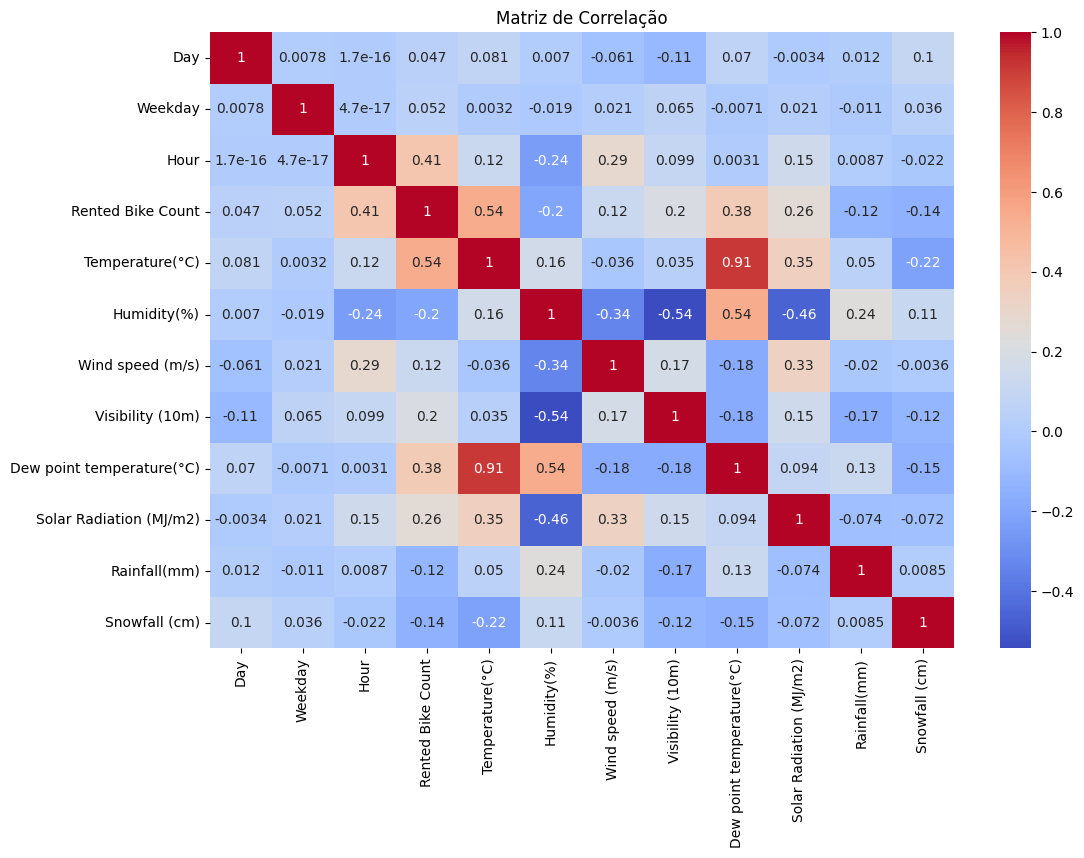

In [37]:

plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


In [38]:

# Fazer a conversão
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Criar colunas novas
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['weekday'] = df['DateTime'].dt.weekday

# Agora pode dropar a coluna original (funciona 100%)
df = df.drop('DateTime', axis=1)

df.head()




,Day,Weekday,Hour,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day,weekday
0,12,5,0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12,3
1,12,5,1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12,3
2,12,5,2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12,3
3,12,5,3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12,3
4,12,5,4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12,3


In [39]:

# Definir X e y
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# Seleção de melhores atributos
selector = SelectKBest(score_func=f_regression, k=8)
X_new = selector.fit_transform(X, y)

# Ver os atributos escolhidos
cols = selector.get_support(indices=True)
selected_features = X.columns[cols]
print("Selected features:", selected_features)


Selected features: Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Visibility (10m)',
       'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)'],
      dtype='object')


In [40]:

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.25, random_state=42)


In [41]:

# Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



## Modelo de Machine Learning

Como o problema é de Regressão (variável alvo contínua), foi escolhido o algoritmo **RandomForestRegressor** da biblioteca scikit-learn.

Motivo da escolha: algoritmo robusto, bom para trabalhar com dados tabulares e não requer muitos ajustes de hiperparâmetros.


In [42]:

# Treinamento
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [43]:

# Predição
y_pred = model.predict(X_test_scaled)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MAE: 184.57
RMSE: 308.57
R² Score: 0.77


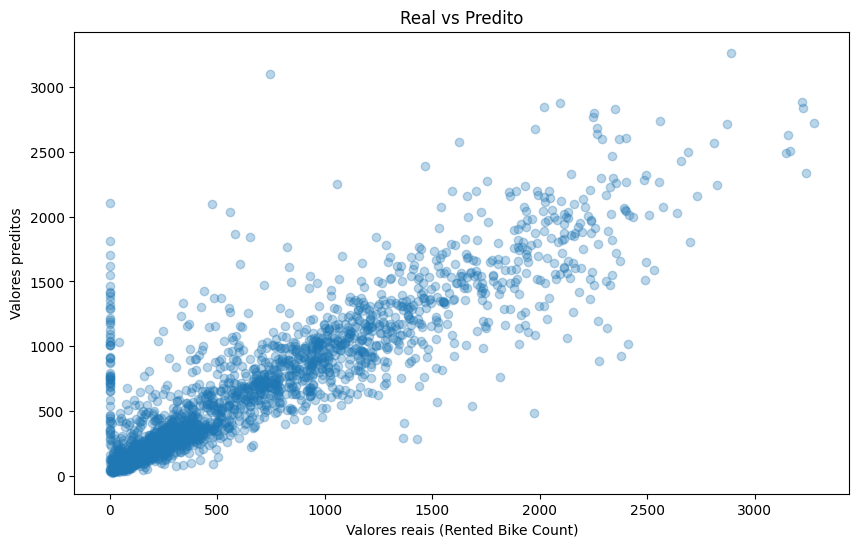

In [44]:

# Plot real vs predito
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Valores reais (Rented Bike Count)")
plt.ylabel("Valores preditos")
plt.title("Real vs Predito")
plt.show()
